In [14]:
import requests

# Your BlueCart API Key
api_key = "9E5D292B07EA4FED8518C738B871D099"

# Search term (Modify this to search for different products)
search_term = "laptop"

# BlueCart API Endpoint
url = f"https://api.bluecartapi.com/request?api_key={api_key}&type=search&search_term={search_term}"

# Make the API request
response = requests.get(url)

# Check the response status
if response.status_code == 200:
    data = response.json()
    print("✅ API Request Successful!")
    print(data)  # This prints the retrieved data
else:
    print(f"❌ API Request Failed! Status Code: {response.status_code}")
    print("Response Text:", response.text)


✅ API Request Successful!
{'request_info': {'success': True, 'credits_used': 2, 'credits_remaining': 98, 'credits_used_this_request': 1}, 'request_parameters': {'type': 'search', 'search_term': 'laptop'}, 'request_metadata': {'created_at': '2025-02-17T20:57:52.648Z', 'processed_at': '2025-02-17T20:57:55.560Z', 'total_time_taken': 2.91, 'walmart_url': 'https://www.walmart.com/search?q=laptop'}, 'search_results': [{'position': 1, 'product': {'title': 'Acer Chromebook 315 15.6 inch Laptop Intel Processor N4500 4GB RAM 64GB eMMC Moonstone Purple', 'link': 'https://www.walmart.com/ip/Acer-Chromebook-315-15-6-inch-Laptop-Intel-Processor-N4500-4GB-RAM-64GB-eMMC-Moonstone-Purple/5113175776?classType=VARIANT&athbdg=L1102', 'item_id': '5113175776', 'product_id': '1EW0WGLYPM1J', 'images': ['https://i5.walmartimages.com/seo/Acer-Chromebook-315-15-6-inch-Laptop-Intel-Processor-N4500-4GB-RAM-64GB-eMMC-Moonstone-Purple_d542e03a-a68d-4881-ab29-6df84957bda0.3c77a28aa49a083b2b9461051a42ce52.jpeg?odnHeig

In [18]:
import requests
import pandas as pd

# API Credentials & Search Term
api_key = "9E5D292B07EA4FED8518C738B871D099"
search_term = "electronics"  # Change this to a specific product category

# API Request
url = f"https://api.bluecartapi.com/request?api_key={api_key}&type=search&search_term={search_term}"
response = requests.get(url)
data = response.json()

# Debug: Print API Response
print("API Response:", data)

# Extract Product Data
if "products" in data:
    product_data = []
    for product in data["products"]:
        product_info = {
            "name": product.get("name"),
            "price": product.get("price"),
            "available_stock": product.get("available_stock", None),  # Ensure field exists
            "reorder_rate": product.get("reorder_rate", None)  # Ensure field exists
        }
        product_data.append(product_info)
    
    # Convert to DataFrame
    df = pd.DataFrame(product_data)
    
    # Handle Missing Columns
    if "available_stock" not in df.columns or "reorder_rate" not in df.columns:
        print("Missing expected data fields. Check API response structure.")
    else:
        # Filter for High Demand, Low Supply Products
        df_filtered = df[(df["available_stock"] < 10) & (df["reorder_rate"] > 70)]
        
        # Save Results
        df_filtered.to_csv("high_demand_low_supply_products.csv", index=False)
        print("Filtered data saved successfully!")
else:
    print("No product data found in API response.")


API Response: {'request_info': {'success': True, 'credits_used': 3, 'credits_remaining': 97, 'credits_used_this_request': 1}, 'request_parameters': {'type': 'search', 'search_term': 'electronics'}, 'request_metadata': {'created_at': '2025-02-17T21:08:23.234Z', 'processed_at': '2025-02-17T21:08:28.349Z', 'total_time_taken': 5.12, 'walmart_url': 'https://www.walmart.com/search?q=electronics'}, 'search_results': [{'position': 1, 'product': {'title': 'Meta Quest 3S 128GB — Get Batman: Arkham Shadow and a 3-Month Trial of Meta Quest+ Included — All-In-One Headset', 'link': 'https://www.walmart.com/ip/Meta-Quest-3S-128GB-Dive-into-Mixed-Reality-Unreal-Experiences-All-In-One-Headset/5871736556?classType=REGULAR', 'item_id': '5871736556', 'product_id': '44P8OQI03PGX', 'images': ['https://i5.walmartimages.com/seo/Meta-Quest-3S-128GB-Dive-into-Mixed-Reality-Unreal-Experiences-All-In-One-Headset_955baa40-f337-4daf-ac38-674e747d13de.899e13d8670b21b94d6deb22c6b1635b.jpeg?odnHeight=180&odnWidth=180&

In [20]:
import requests
import pandas as pd

# API Credentials & Search Term
api_key = "9E5D292B07EA4FED8518C738B871D099"
search_term = "beauty"  # Example category

# API Request
url = f"https://api.bluecartapi.com/request?api_key={api_key}&type=search&search_term={search_term}"
response = requests.get(url)

# Check if request was successful
if response.status_code == 200:
    data = response.json()

    # Debug: Print API Response
    print("API Response:", data)

    # Extract Facets Information (to filter out Walmart-sold products)
    if "facets" in data:
        walmart_facet = None
        for facet in data["facets"]:
            if facet["name"] == "sold_by":
                walmart_facet = facet
                break
        
        # Filter out products sold by Walmart if the facet is found
        if walmart_facet:
            non_walmart_value = next((value["param_value"] for value in walmart_facet["values"] if value["name"] != "Walmart"), None)

            if non_walmart_value:
                # Add non-walmart filter to the search URL for the next request
                url_with_filter = f"{url}&facets=sold_by:{non_walmart_value}"
                response = requests.get(url_with_filter)
                data = response.json()
            else:
                print("No non-Walmart products found in facets.")
        else:
            print("Sold-by facet not found.")
    
    # Extract Product Data
    if "products" in data:
        product_data = []
        for product in data["products"]:
            product_info = {
                "name": product.get("name"),
                "price": product.get("price"),
                "available_stock": product.get("available_stock", None),
                "reorder_rate": product.get("reorder_rate", None),
                "sold_by": product.get("sold_by", "Unknown")  # Include the 'sold_by' field to check if it's Walmart
            }
            product_data.append(product_info)
        
        # Convert to DataFrame
        df = pd.DataFrame(product_data)

        # Handle Missing Columns
        if "available_stock" not in df.columns or "reorder_rate" not in df.columns:
            print("Missing expected data fields. Check API response structure.")
        else:
            # Drop rows with missing values in 'available_stock' or 'reorder_rate'
            df = df.dropna(subset=["available_stock", "reorder_rate"])

            # Filter for High Demand, Low Supply Products
            df_filtered = df[(df["available_stock"] < 10) & (df["reorder_rate"] > 70) & (df["sold_by"] != "Walmart")]
            
            # Save Results
            df_filtered.to_csv("high_demand_low_supply_non_walmart_products.csv", index=False)
            print("Filtered data saved successfully!")
    else:
        print("No product data found in API response.")
else:
    print(f"API request failed with status code {response.status_code}")


API Response: {'request_info': {'success': True, 'credits_used': 4, 'credits_remaining': 96, 'credits_used_this_request': 1}, 'request_parameters': {'type': 'search', 'search_term': 'beauty'}, 'request_metadata': {'created_at': '2025-02-17T21:46:40.353Z', 'processed_at': '2025-02-17T21:46:44.656Z', 'total_time_taken': 4.3, 'walmart_url': 'https://www.walmart.com/search?q=beauty'}, 'search_results': [{'position': 1, 'product': {'title': 'Bubble Skincare Slam Dunk Hydrating Face Moisturizer, for Normal to Dry Skin, 1.7 fl oz/ 50mL', 'link': 'https://www.walmart.com/ip/Bubble-Skincare-Slam-Dunk-Hydrating-Face-Moisturizer-for-Normal-to-Dry-Skin-1-7-fl-oz-50mL/577141522?classType=REGULAR', 'item_id': '577141522', 'product_id': '14ID3GULZ6ZF', 'images': ['https://i5.walmartimages.com/seo/Bubble-Skincare-Slam-Dunk-Hydrating-Face-Moisturizer-for-Normal-to-Dry-Skin-1-7-fl-oz-50mL_783e275f-4fe4-4139-af40-5c6d11a6d402.feebd88f40d1e6685818f896fe6c0f63.jpeg?odnHeight=180&odnWidth=180&odnBg=FFFFFF']

In [25]:

import requests
import pandas as pd

# API Credentials & Search Term
api_key = "9E5D292B07EA4FED8518C738B871D099"
search_term = "beauty"  # Example category

# API Request
url = f"https://api.bluecartapi.com/request?api_key={api_key}&type=search&search_term={search_term}"
response = requests.get(url)

# Check if request was successful
if response.status_code == 200:
    data = response.json()

    # Debug: Print API Response
    print("API Response:", data)

    # Extract Product Data
    if "products" in data:
        product_data = []
        for product in data["products"]:
            product_info = {
                "name": product.get("name"),
                "price": product.get("price"),
                "available_stock": product.get("available_stock", None),
                "reorder_rate": product.get("reorder_rate", None),
                "sold_by": product.get("sold_by", "Unknown")  # Include the 'sold_by' field to check if it's Walmart.com
            }
            product_data.append(product_info)
        
        # Convert to DataFrame
        df = pd.DataFrame(product_data)

        # Handle Missing Columns
        if "available_stock" not in df.columns or "reorder_rate" not in df.columns:
            print("Missing expected data fields. Check API response structure.")
        else:
            # Drop rows with missing values in 'available_stock' or 'reorder_rate'
            df = df.dropna(subset=["available_stock", "reorder_rate"])

            # Filter for High Demand, Low Supply Products and Exclude Walmart.com
            df_filtered = df[(df["available_stock"] < 10) & (df["reorder_rate"] > 70) & (df["sold_by"] != "Walmart.com")]
            
            # Save Results
            df_filtered.to_csv("high_demand_low_supply_non_walmart_com_products.csv", index=False)
            print("Filtered data saved successfully!")
    else:
        print("No product data found in API response.")
else:
    print(f"API request failed with status code {response.status_code}")


API Response: {'request_info': {'success': True, 'credits_used': 6, 'credits_remaining': 94, 'credits_used_this_request': 1}, 'request_parameters': {'type': 'search', 'search_term': 'beauty'}, 'request_metadata': {'created_at': '2025-02-17T21:57:24.025Z', 'processed_at': '2025-02-17T21:57:27.085Z', 'total_time_taken': 3.06, 'walmart_url': 'https://www.walmart.com/search?q=beauty'}, 'search_results': [{'position': 1, 'product': {'title': 'Olay Skin Care Super Serum Facial Serum, 5 in 1 Anti-Aging, All Skin Types, 1.0 fl oz', 'link': 'https://www.walmart.com/ip/Olay-Super-Serum-5-in-1-Anti-Aging-Facial-Serum-Smoothing-Skin-Care-All-Skin-Types-1-0-fl-oz/1525408318?classType=VARIANT', 'item_id': '1525408318', 'product_id': '6C71GFGQ47OK', 'images': ['https://i5.walmartimages.com/seo/Olay-Super-Serum-5-in-1-Anti-Aging-Facial-Serum-Smoothing-Skin-Care-All-Skin-Types-1-0-fl-oz_abb15cef-4c31-4f59-940a-7edf513da00b.9fce03366607e5ae7626f626e8bec2e1.jpeg?odnHeight=180&odnWidth=180&odnBg=FFFFFF'],

In [54]:
import requests
import pandas as pd

# API Credentials & Search Term
api_key = "9E5D292B07EA4FED8518C738B871D099"
search_term = "Nike shoes"  # Example category

# API Request
url = f"https://api.bluecartapi.com/request?api_key={api_key}&type=search&search_term={search_term}"
response = requests.get(url)

# Check if request was successful
if response.status_code == 200:
    data = response.json()

    # Debug: Print API Response
    print("API Response:", data)

    # Extract Product Data
    if "search_results" in data:
        product_data = []
        for result in data["search_results"]:
            product = result.get("product", {})
            inventory = result.get("inventory", {})
            offers = result.get("offers", {})
            primary_offer = offers.get("primary", {})

            product_info = {
                "title": product.get("title"),
                "price": primary_offer.get("price"),
                "in_stock": inventory.get("in_stock", False),  # Use in_stock as a proxy for supply
                "ratings_total": product.get("ratings_total", 0),  # Use ratings_total as a proxy for demand
                "best_seller": product.get("best_seller", False),  # Use best_seller as a proxy for demand
                "seller_name": primary_offer.get("seller", {}).get("name", "Unknown")  # Include seller name
            }
            product_data.append(product_info)
        
        # Convert to DataFrame
        df = pd.DataFrame(product_data)

        # Debug: Print DataFrame
        print("Product Data:")
        print(df)

        # Define High Demand and Low Supply Criteria
        # High Demand: Products with high ratings_total or marked as best_seller
        # Low Supply: Products not in stock (in_stock == False)
        df_filtered = df[
            (df["in_stock"] == False) &  # Low supply (not in stock)
            ((df["ratings_total"] > 1000) | (df["best_seller"] == True))  # High demand
        ]

        # Save Results
        df_filtered.to_csv("high_demand_low_supply_products.csv", index=False)
        print("Filtered data saved successfully!")
    else:
        print("No product data found in API response.")
else:
    print(f"API request failed with status code {response.status_code}")

API Response: {'request_info': {'success': True, 'credits_used': 16, 'credits_remaining': 84, 'credits_used_this_request': 1}, 'request_parameters': {'type': 'search', 'search_term': 'Nike shoes'}, 'request_metadata': {'created_at': '2025-02-17T22:52:59.675Z', 'processed_at': '2025-02-17T22:53:04.608Z', 'total_time_taken': 4.93, 'walmart_url': 'https://www.walmart.com/search?q=Nike+shoes'}, 'search_results': [{'position': 1, 'product': {'title': 'Nike Downshifter 12 Mens Running Trainers - Size 10.5', 'link': 'https://www.walmart.com/ip/Nike-Downshifter-12-Mens-Running-Trainers-Size-10-5/3284903851?classType=REGULAR', 'brand': 'Nike', 'item_id': '3284903851', 'product_id': '6M67FSOITRNM', 'images': ['https://i5.walmartimages.com/seo/Nike-Downshifter-12-Mens-Running-Trainers-Size-10-5_166e251a-943f-472a-a66f-2f75134f8669.7baa35e6cdf00caf75b5f341af7cf6fe.png?odnHeight=180&odnWidth=180&odnBg=FFFFFF'], 'main_image': 'https://i5.walmartimages.com/seo/Nike-Downshifter-12-Mens-Running-Trainer

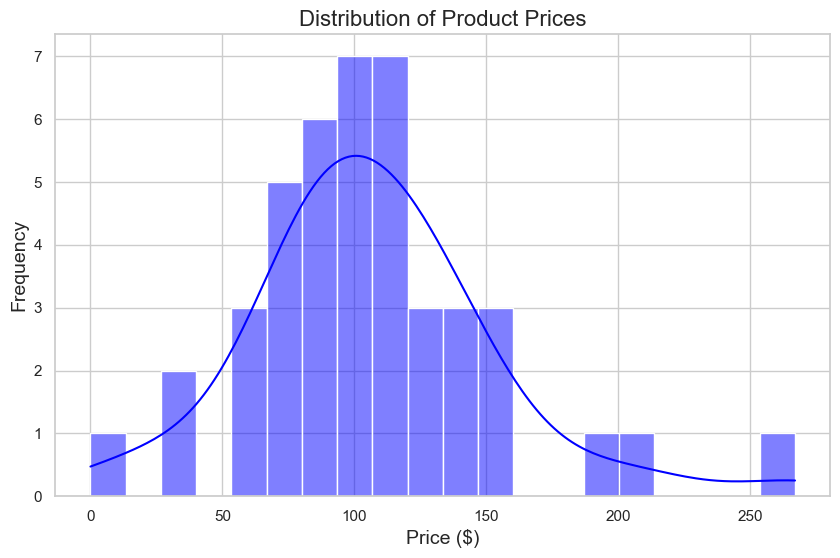

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# 1. Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df["price"], bins=20, kde=True, color="blue")
plt.title("Distribution of Product Prices", fontsize=16)
plt.xlabel("Price ($)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()



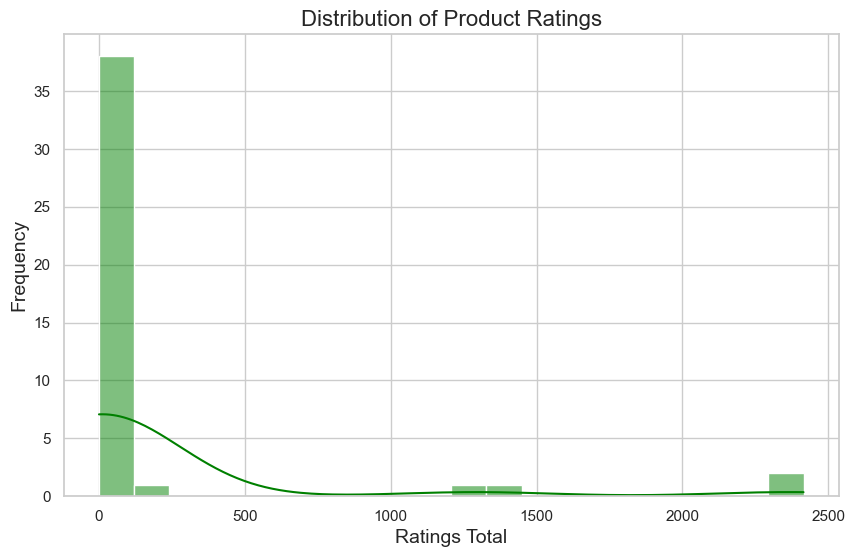

In [60]:
# 2. Ratings Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df["ratings_total"], bins=20, kde=True, color="green")
plt.title("Distribution of Product Ratings", fontsize=16)
plt.xlabel("Ratings Total", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

/var/folders/wn/07prvhn92pjb0pq01vtf8v340000gn/T/ipykernel_17635/591162246.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seller_counts.index, y=seller_counts.values, palette="viridis")


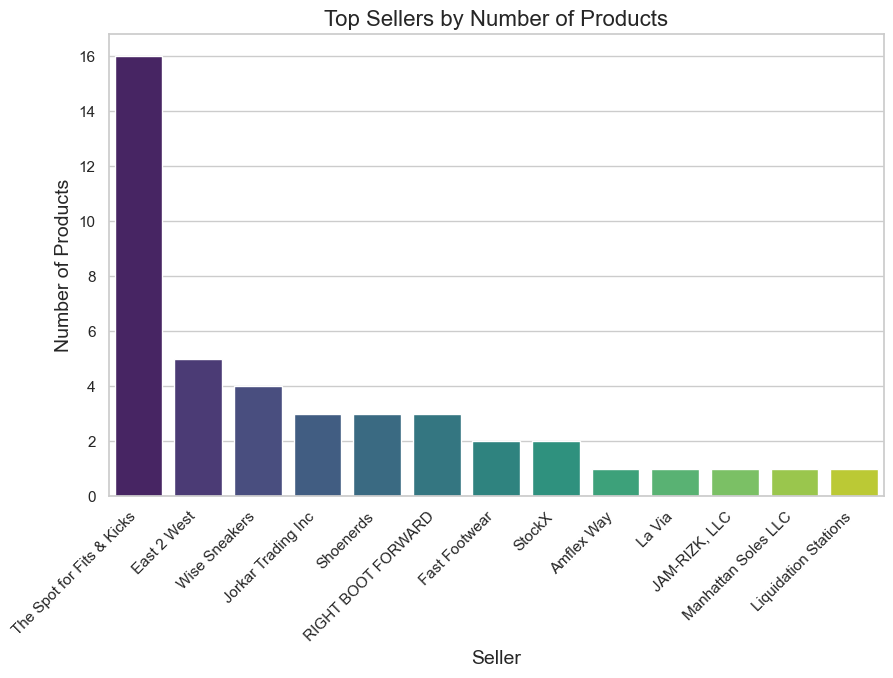

In [62]:
# 3. Top Sellers
seller_counts = df["seller_name"].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=seller_counts.index, y=seller_counts.values, palette="viridis")
plt.title("Top Sellers by Number of Products", fontsize=16)
plt.xlabel("Seller", fontsize=14)
plt.ylabel("Number of Products", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.show()

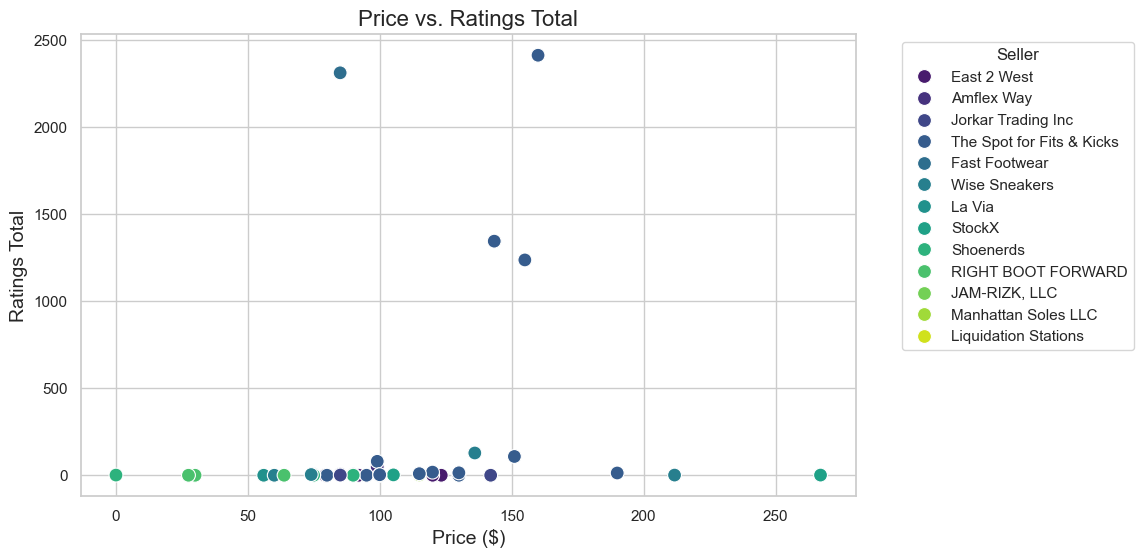

In [66]:
# 4. Price vs. Ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["price"], y=df["ratings_total"], hue=df["seller_name"], palette="viridis", s=100)
plt.title("Price vs. Ratings Total", fontsize=16)
plt.xlabel("Price ($)", fontsize=14)
plt.ylabel("Ratings Total", fontsize=14)
plt.legend(title="Seller", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()